In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Параметри моделі

In [2]:
n_periods = 6  # Кількість періодів (місяців)
strategies = {
    "Консервативна": {
        "projects": np.array([2, 3, 3, 4, 4, 5]),
        "advertising_budget": np.array([1500, 2000, 2500, 3000, 3500, 4000]),
        "salaries": np.array([10000, 11000, 12000, 13000, 14000, 15000])
    },
    "Збалансована": {
        "projects": np.array([3, 4, 5, 6, 7, 8]),
        "advertising_budget": np.array([3000, 4000, 5000, 6000, 7000, 8000]),
        "salaries": np.array([12000, 14000, 16000, 18000, 20000, 22000])
    },
    "Агресивна": {
        "projects": np.array([4, 5, 6, 7, 9, 10]),
        "advertising_budget": np.array([5000, 6000, 7000, 8000, 9000, 10000]),
        "salaries": np.array([14000, 16000, 18000, 20000, 23000, 26000])
    }
}

fixed_costs = 7000  # Постійні витрати (оренда, електроенергія, операційні витрати)
tax_rate = 0.22  # Ставка податку
project_income = 7500  # Дохід з одного проекту

### Обчислення прибутку

In [3]:
def calculate_profit(projects, advertising_budget, salaries, fixed_costs, project_income, tax_rate):
    revenue = projects * project_income  # Дохід
    costs = advertising_budget + salaries + fixed_costs  # Витрати
    net_profit = revenue - costs  # Чистий прибуток
    net_profit_after_tax = net_profit * (1 - tax_rate)  # Прибуток після податків
    return net_profit_after_tax

In [4]:
profits = {}
for strategy_name, strategy_params in strategies.items():
    profits[strategy_name] = calculate_profit(
        strategy_params["projects"],
        strategy_params["advertising_budget"],
        strategy_params["salaries"],
        fixed_costs, project_income, tax_rate
    )

### Визначення оптимальної стратегії

In [5]:
average_profits = {strategy: np.mean(profit) for strategy, profit in profits.items()}
optimal_strategy = max(average_profits, key=average_profits.get)

In [6]:
print(f'Оптимальна стратегія: {optimal_strategy} з середнім прибутком {average_profits[optimal_strategy]:.2f} $')

Оптимальна стратегія: Агресивна з середнім прибутком 13455.00 $


### Візуалізація

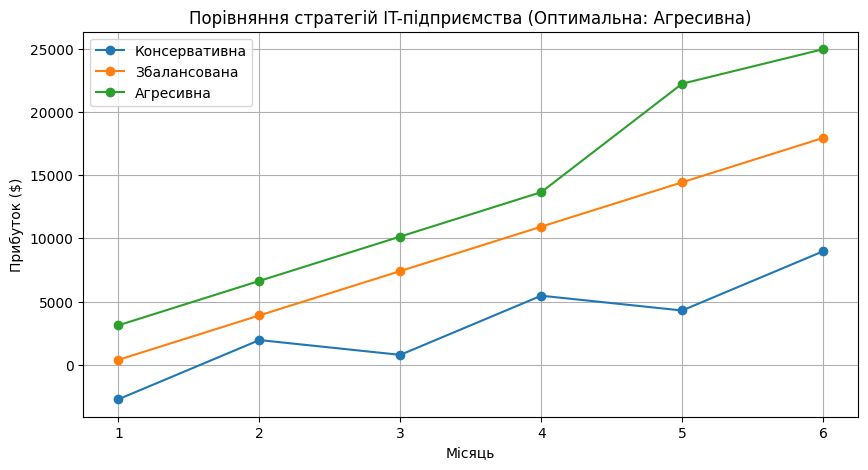

In [7]:
plt.figure(figsize=(10, 5))
for strategy_name, profit in profits.items():
    plt.plot(range(1, n_periods + 1), profit, marker='o', label=strategy_name)

plt.title(f'Порівняння стратегій IT-підприємства (Оптимальна: {optimal_strategy})')
plt.xlabel('Місяць')
plt.ylabel('Прибуток ($)')
plt.legend()
plt.grid()
plt.show()